# 1. Preliminaries

Set working directory

In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'/home/romagnolilab/Documents/GitHub/PROJECT'

Load Dependables

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap as ump

2023-03-25 12:35:55.055709: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-25 12:35:55.093636: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from src.data_preprocess import DataPreprocessing
from src.dimensionality import DimensionalityReduction


Load Data

In [4]:
pathX = "data/raw/RawData.xlsx"

preprocess = DataPreprocessing()
data = preprocess.load_data(pathX, target_path = None, is_dataframe = True, justFeatures = False)

In [5]:
data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,0.197826,...,26.662173,60.482854,0,24.229301,37.208198,46.430526,0,35.865322,12.930642,100
2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,0.196092,...,26.689544,60.524644,0,24.171763,37.227431,46.427192,0,35.719177,11.714423,100
3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,0.204023,...,26.705507,60.546193,0,25.179022,37.243766,46.442544,0,35.740715,10.734676,100
4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,0.220561,...,26.768653,60.568588,0,26.922729,37.211698,46.407497,0,35.736154,10.311783,100
5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,0.236146,...,26.396773,60.637598,0,29.039605,37.199517,46.424034,0,35.890716,11.181380,100


Transform Data

In [6]:
norm_data = preprocess.scale_data()
norm_data.head()

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
0,0.350968,0.292521,0.238525,0.468659,0.777944,0.757940,0.516965,0.493909,0.450876,0.240103,...,0.266622,0.464588,0.0,0.241389,0.277760,0.580246,0.0,0.788559,0.310381,0.0
1,0.350702,0.308210,0.297161,0.459386,0.788652,0.739205,0.521489,0.509693,0.256541,0.238025,...,0.266895,0.470400,0.0,0.240813,0.280527,0.578484,0.0,0.769701,0.246380,0.0
2,0.350251,0.459634,0.209477,0.479083,0.778920,0.784015,0.529546,0.463563,0.609511,0.247526,...,0.267055,0.473396,0.0,0.250898,0.282877,0.586596,0.0,0.772480,0.194822,0.0
3,0.352372,0.300972,0.251013,0.442794,0.727265,0.789300,0.533128,0.363171,0.393308,0.267338,...,0.267687,0.476511,0.0,0.268356,0.278263,0.568077,0.0,0.771891,0.172568,0.0
4,0.350848,0.234122,0.252805,0.514226,0.781072,0.752830,0.536877,0.428209,0.375227,0.286009,...,0.263968,0.486108,0.0,0.289550,0.276511,0.576815,0.0,0.791836,0.218329,0.0


# 2. Dimensionality Reduction

In [7]:
dreduction = DimensionalityReduction(norm_data)

## 2.1 PCA

A. Number of Components = 2

In [8]:
pca_2D_data = dreduction.fit_PCA(n_comp = 2)

B. Number of Components = 3

In [9]:
pca_3D_data = dreduction.fit_PCA(n_comp = 3)

# 2.2 tSNE

A. number of components = 2

In [10]:
tsne_2D_data = dreduction.fit_tSNE(n_comp = 2, perplexity = 5)

B. number of component = 3

In [11]:
tsne_3D_data = dreduction.fit_tSNE(n_comp = 3, perplexity = 5)

# 2.3 ISOMAP

A. number of component = 2

In [12]:
ISOMAP_2D_data = dreduction.fit_isomap(n_comp = 2, neighbors = 5)

B. number of component = 3

In [13]:
ISOMAP_3D_data = dreduction.fit_isomap(n_comp = 3, neighbors = 5)

# 2.4 fast ICA

A. number of components = 2

In [14]:
fastICA_2D_data = dreduction.fit_fastICA(n_comp = 2, iterations = 100000)

B. number of components = 3

In [15]:
fastICA_3D_data = dreduction.fit_fastICA(n_comp = 3, iterations = 100000)

# 2.5 Spectral Embedding

A. number of components = 2

In [16]:
embedding_2D_data = dreduction.fit_SpectralEmbedding(n_comp = 2)

B. number of components = 3

In [17]:
embedding_3D_data = dreduction.fit_SpectralEmbedding(n_comp = 3)

# 2.6 UMAP

A. number of components = 2

In [18]:
umap_2D_data = dreduction.fit_UMAP(n_comp = 2, state = 16)

B. number of components = 3

In [19]:
umap_3D_data = dreduction.fit_UMAP(n_comp = 3, state = 16)

In [20]:
# # create UMAP
# umap = ump.UMAP(random_state = 16, n_components=2)
# # fit and transform data
# umap_2D_data = umap.fit_transform(norm_data)
# # plot cluster
# plt.figure(figsize=(6, 4))
# plt.scatter(x = umap_2D_data[:, 0], y = umap_2D_data[:, 1])
# plt.xlabel(f"UMAP 1")
# plt.ylabel(f"UMAP 2")
# plt.title('UMAP')
# plt.xlim([umap_2D_data[:, 0].min() - 0.5, umap_2D_data[:, 0].max() + 0.5])
# plt.ylim([umap_2D_data[:, 1].min() - 0.5, umap_2D_data[:, 1].max() + 0.5])
# plt.legend('',frameon=False)

In [21]:
# Effect of min_samples
def effect_of_umapneigbors(data, components = 2, neighbors = [2, 5, 10, 20, 30, 50], type = 'UMAP'):

    result_umap_2D_data = {}

    for idx, param in enumerate(neighbors):

        umap_2D = ump.UMAP(n_neighbors = param, n_components = components, random_state=42)

        umap_2D_data = umap_2D.fit_transform(data)

        result_umap_2D_data['M' + str(idx)] = umap_2D_data

    # create a figure and a subplot grid with 3 rows and 2 columns

    fig = plt.figure(figsize=(6, 4), layout='constrained')
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # create scatter plots on the subplots using Seaborn
    x = data[:, 0]; y = data[:, 1]
    
    axs321 = fig.add_subplot(231)
    axs321.scatter(x, y, c = result_umap_2D_data['M0'],  s = 10, cmap = 'hsv')
    
    axs322 = fig.add_subplot(232)
    axs322.scatter(x, y, c = result_umap_2D_data['M1'],  s = 10, cmap = 'hsv')
    
    axs323 = fig.add_subplot(233)
    axs323.scatter(x, y, c = result_umap_2D_data['M2'],  s = 10, cmap = 'hsv')
    
    axs324 = fig.add_subplot(234)
    axs324.scatter(x, y, c = result_umap_2D_data['M3'],  s = 10, cmap = 'hsv')
    
    axs325 = fig.add_subplot(235)
    axs325.scatter(x, y, c = result_umap_2D_data['M4'],  s = 10, cmap = 'hsv')
    
    axs326 = fig.add_subplot(236)
    axs326.scatter(x, y, c = result_umap_2D_data['M5'],  s = 10, cmap = 'hsv')

    # set titles for each subplot
    axs321.set_title(f"n_neighbors : {neighbors[0]}"); axs321.set_xlabel(f'{type[0]} 1'); axs321.set_ylabel(f'{type[0]} 2')
    axs322.set_title(f"n_neighbors : {neighbors[1]}"); axs322.set_xlabel(f'{type[0]} 1'); axs322.set_ylabel(f'{type[0]} 2')
    axs323.set_title(f"n_neighbors : {neighbors[2]}"); axs323.set_xlabel(f'{type[0]} 1'); axs323.set_ylabel(f'{type[0]} 2')
    axs324.set_title(f"n_neighbors : {neighbors[3]}"); axs324.set_xlabel(f'{type[0]} 1'); axs324.set_ylabel(f'{type[0]} 2')
    axs325.set_title(f"n_neighbors : {neighbors[4]}"); axs325.set_xlabel(f'{type[0]} 1'); axs325.set_ylabel(f'{type[0]} 2')
    axs326.set_title(f"n_neighbors : {neighbors[5]}"); axs326.set_xlabel(f'{type[0]} 1'); axs326.set_ylabel(f'{type[0]} 2')

    # display the figure
    plt.show()

    # save figure
    plt.savefig(f'./reports/{type}_2D_scatterplot_manyNeighbors.png')

# 3. Clustering

In [22]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, Birch, AgglomerativeClustering
import hdbscan


In [23]:
def plot_2D_scatter(data, labels, type = ['PCA', 'Kmeans']):
    """
    params: data (a 2D data) & labels (a dictionary)
    returns: profile of scatterplot of transformed data
    """

    plt.figure(figsize=(6, 4))
    plt.scatter( x = data[:, 0], y = data[:, 1], c = labels, s = 10,  cmap = 'hsv')

    plt.xlabel(f"{type[0]} 1")
    plt.ylabel(f"{type[0]} 2")
    plt.title(type[1])
    plt.xlim([data[:, 0].min() - 0.5, data[:, 0].max() + 0.5])
    plt.ylim([data[:, 1].min() - 0.5, data[:, 1].max() + 0.5])
    plt.legend('',frameon=False)
    plt.savefig(f'./reports/{type[0]}_{type[1]}_2D_scatterplot.png') 

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

## 3.1 PCA inputs

### 3.1.1 KMEans

In [24]:
kmeans = KMeans(n_clusters = 5, random_state = 1, n_init = 10)

In [25]:
# fit data
kmeans_with_pca = kmeans.fit(pca_2D_data)
# predict cluster
kmeans_PCA_2D_data = kmeans_with_pca.predict(pca_2D_data)

Estimated number of clusters: 5
Estimated number of noise points: 0


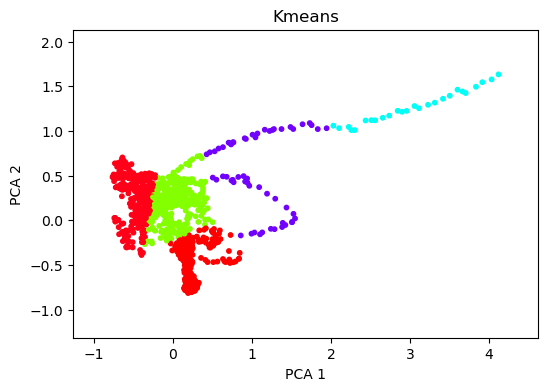

In [26]:
plot_2D_scatter(data = pca_2D_data, labels = kmeans_PCA_2D_data, type = ['PCA', 'Kmeans'])

### 3.1.2 AgglomerativeClustering

In [27]:
# instantiate algorithm
aggloClust = AgglomerativeClustering(n_clusters = 5)

In [28]:
# fit data 
aggloClust_with_pca = aggloClust.fit(pca_2D_data)

In [29]:
# predict cluster
aggloClust_PCA_2D_data = aggloClust_with_pca.labels_

Estimated number of clusters: 5
Estimated number of noise points: 0


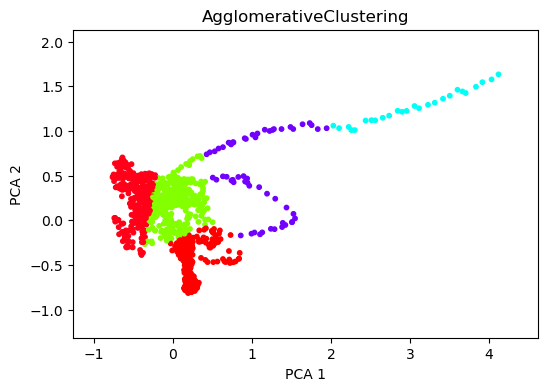

In [30]:
# plot cluster

plot_2D_scatter(data = pca_2D_data, labels = kmeans_PCA_2D_data, type = ['PCA', 'AgglomerativeClustering'])

### 3.1.3 DBSCAN

In [31]:
dbscan = DBSCAN(eps=0.1, min_samples=5)

In [32]:
# fit data and predict cluster
dbscan_with_pca = dbscan.fit_predict(pca_2D_data)

Estimated number of clusters: 6
Estimated number of noise points: 68


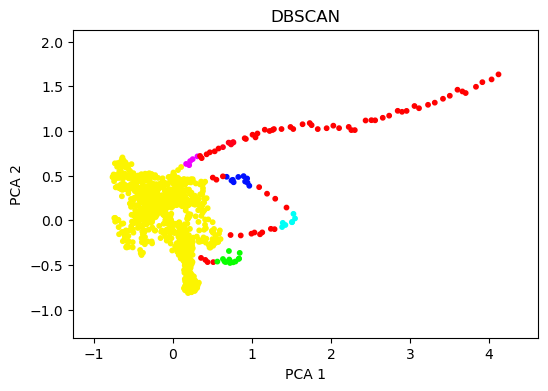

In [33]:
# plot cluster

plot_2D_scatter(data = pca_2D_data, labels = dbscan_with_pca, type = ['PCA', 'DBSCAN'])

Effect of min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point

In [34]:
# Effect of min_samples
def effect_of_min_samples(data, eps = 0.1, parameters = [1, 5, 10, 15, 20, 30], type = 'PCA'):

    result_dbscan_2D_data = {}
    cluster = {}
    noise = {}

    for idx, ms in enumerate(parameters):

        dbscan_2D = DBSCAN(eps = eps, min_samples = ms)

        dbscan_2D_data = dbscan_2D.fit_predict(data)

        result_dbscan_2D_data['M' + str(idx)] = dbscan_2D_data
        cluster['M'+str(idx)] = len(set(dbscan_2D_data)) - (1 if -1 in dbscan_2D_data else 0)
        noise['M'+str(idx)] = list(dbscan_2D_data).count(-1)

    # create a figure and a subplot grid with 3 rows and 2 columns

    fig = plt.figure(figsize=(6, 4), layout='constrained')
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # create scatter plots on the subplots using Seaborn
    x = data[:, 0]; y = data[:, 1]
    
    axs321 = fig.add_subplot(231)
    axs321.scatter(x, y, c = result_dbscan_2D_data['M0'],  s = 10, cmap = 'hsv')
    
    axs322 = fig.add_subplot(232)
    axs322.scatter(x, y, c = result_dbscan_2D_data['M1'],  s = 10, cmap = 'hsv')
    
    axs323 = fig.add_subplot(233)
    axs323.scatter(x, y, c = result_dbscan_2D_data['M2'],  s = 10, cmap = 'hsv')
    
    axs324 = fig.add_subplot(234)
    axs324.scatter(x, y, c = result_dbscan_2D_data['M3'],  s = 10, cmap = 'hsv')
    
    axs325 = fig.add_subplot(235)
    axs325.scatter(x, y, c = result_dbscan_2D_data['M4'],  s = 10, cmap = 'hsv')
    
    axs326 = fig.add_subplot(236)
    axs326.scatter(x, y, c = result_dbscan_2D_data['M5'],  s = 10, cmap = 'hsv')

    # set titles for each subplot
    axs321.set_title(f"S : {parameters[0]}, C: {cluster['M0']}, N: {noise['M0']}"); axs321.set_xlabel(f'{type[0]} 1'); axs321.set_ylabel(f'{type[0]} 2')
    axs322.set_title(f"S : {parameters[1]}, C: {cluster['M1']}, N: {noise['M1']}"); axs322.set_xlabel(f'{type[0]} 1'); axs322.set_ylabel(f'{type[0]} 2')
    axs323.set_title(f"S : {parameters[2]}, C: {cluster['M2']}, N: {noise['M2']}"); axs323.set_xlabel(f'{type[0]} 1'); axs323.set_ylabel(f'{type[0]} 2')
    axs324.set_title(f"S : {parameters[3]}, C: {cluster['M3']}, N: {noise['M3']}"); axs324.set_xlabel(f'{type[0]} 1'); axs324.set_ylabel(f'{type[0]} 2')
    axs325.set_title(f"S : {parameters[4]}, C: {cluster['M4']}, N: {noise['M4']}"); axs325.set_xlabel(f'{type[0]} 1'); axs325.set_ylabel(f'{type[0]} 2')
    axs326.set_title(f"S : {parameters[5]}, C: {cluster['M5']}, N: {noise['M5']}"); axs326.set_xlabel(f'{type[0]} 1'); axs326.set_ylabel(f'{type[0]} 2')

    # display the figure
    plt.show()

    # save figure
    plt.savefig(f'./reports/{type[0]}_{type[1]}_2D_scatterplot_manyMinimum_samples.png')

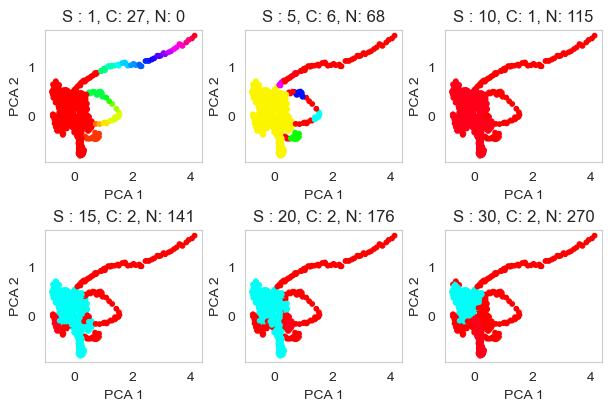

<Figure size 640x480 with 0 Axes>

In [35]:
effect_of_min_samples(
                        data = pca_2D_data, eps = 0.1, parameters = [1, 5, 10, 15, 20, 30], type = ['PCA', 'DBSCAN']
                        )

Effect of eps i.e. maximum distance between two samples for one to be considered as in the neighborhood of the other.

In [36]:
# Effect of min_samples
def effect_of_eps(data, min_sample_ = 15, parameters = [0.1, 0.3, 0.5, 1, 5, 10], type = 'PCA'):

    result_dbscan_2D_data = {}
    cluster = {}
    noise = {}

    for idx, ms in enumerate(parameters):

        dbscan_2D = DBSCAN(eps = ms, min_samples = min_sample_)

        dbscan_2D_data = dbscan_2D.fit_predict(data)

        result_dbscan_2D_data['M' + str(idx)] = dbscan_2D_data
        cluster['M'+str(idx)] = len(set(dbscan_2D_data)) - (1 if -1 in dbscan_2D_data else 0)
        noise['M'+str(idx)] = list(dbscan_2D_data).count(-1)

    # create a figure and a subplot grid with 3 rows and 2 columns

    fig = plt.figure(figsize=(6, 4), layout='constrained')
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # create scatter plots on the subplots using Seaborn
    x = data[:, 0]; y = data[:, 1]
    
    axs321 = fig.add_subplot(231)
    axs321.scatter(x, y, c = result_dbscan_2D_data['M0'],  s = 10, cmap = 'hsv')
    
    axs322 = fig.add_subplot(232)
    axs322.scatter(x, y, c = result_dbscan_2D_data['M1'],  s = 10, cmap = 'hsv')
    
    axs323 = fig.add_subplot(233)
    axs323.scatter(x, y, c = result_dbscan_2D_data['M2'],  s = 10, cmap = 'hsv')
    
    axs324 = fig.add_subplot(234)
    axs324.scatter(x, y, c = result_dbscan_2D_data['M3'],  s = 10, cmap = 'hsv')
    
    axs325 = fig.add_subplot(235)
    axs325.scatter(x, y, c = result_dbscan_2D_data['M4'],  s = 10, cmap = 'hsv')
    
    axs326 = fig.add_subplot(236)
    axs326.scatter(x, y, c = result_dbscan_2D_data['M5'],  s = 10, cmap = 'hsv')

    # set titles for each subplot
    axs321.set_title(f"eps : {parameters[0]}, C: {cluster['M0']}, N: {noise['M0']}"); axs321.set_xlabel(f'{type[0]} 1'); axs321.set_ylabel(f'{type[0]} 2')
    axs322.set_title(f"eps : {parameters[1]}, C: {cluster['M1']}, N: {noise['M1']}"); axs322.set_xlabel(f'{type[0]} 1'); axs322.set_ylabel(f'{type[0]} 2')
    axs323.set_title(f"eps : {parameters[2]}, C: {cluster['M2']}, N: {noise['M2']}"); axs323.set_xlabel(f'{type[0]} 1'); axs323.set_ylabel(f'{type[0]} 2')
    axs324.set_title(f"eps : {parameters[3]}, C: {cluster['M3']}, N: {noise['M3']}"); axs324.set_xlabel(f'{type[0]} 1'); axs324.set_ylabel(f'{type[0]} 2')
    axs325.set_title(f"eps : {parameters[4]}, C: {cluster['M4']}, N: {noise['M4']}"); axs325.set_xlabel(f'{type[0]} 1'); axs325.set_ylabel(f'{type[0]} 2')
    axs326.set_title(f"eps : {parameters[5]}, C: {cluster['M5']}, N: {noise['M5']}"); axs326.set_xlabel(f'{type[0]} 1'); axs326.set_ylabel(f'{type[0]} 2')

    # display the figure
    plt.show()

    # save figure
    plt.savefig(f'./reports/{type[0]}_{type[1]}_2D_scatterplot_manyEPS.png')

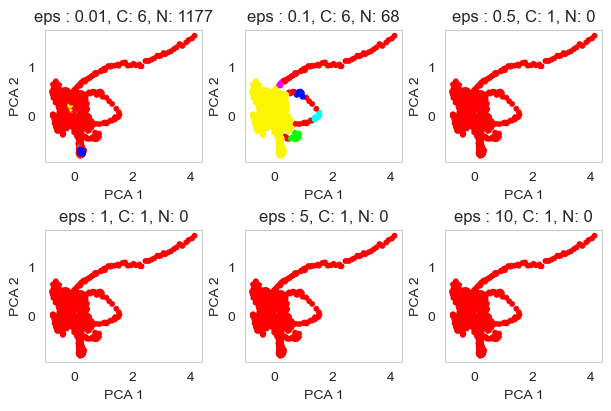

<Figure size 640x480 with 0 Axes>

In [37]:
effect_of_eps(
                data = pca_2D_data, min_sample_ = 5, parameters = [0.01, 0.1, 0.5, 1, 5, 10], type = ['PCA', 'DBSCAN']
            )

### 3.1.4 HDBSCAN

In [38]:
# instantiate algorithm
hdbscan_ = hdbscan.HDBSCAN(min_cluster_size = 3, min_samples = 50)

In [39]:
# fit data and predict cluster
hdbscan_PCA_2D_data = hdbscan_.fit_predict(pca_2D_data)

Estimated number of clusters: 2
Estimated number of noise points: 232


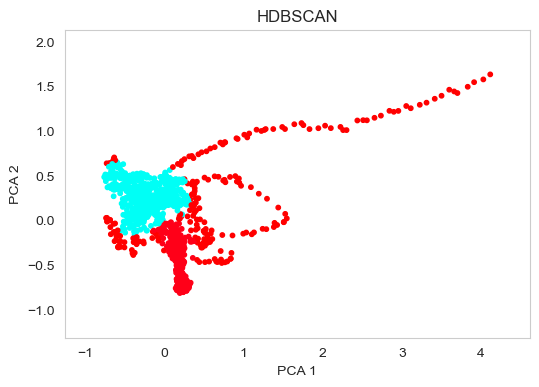

In [40]:
# plot cluster

plot_2D_scatter(data = pca_2D_data, labels = hdbscan_PCA_2D_data, type = ['PCA', 'HDBSCAN'])

Effect of min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point. The simplest intuition for what min_samples does is provide a measure of how \
conservative you want you clustering to be. The larger the value of min_samples you provide, the more conservative the clustering – more points will be declared as noise, \
and clusters will be restricted to progressively more dense areas. We can see this in practice by leaving the min_cluster_size at 60, but reducing min_samples to 1.

In [41]:
# Effect of min_samples
def hdbscan_effect_of_min_samples(data, min_clust_size = 5, parameters = [1, 5, 10, 20, 30, 50], type = ['PCA', 'HDSCAN']):

    result_dbscan_2D_data = {}
    cluster = {}
    noise = {}

    for idx, ms in enumerate(parameters):

        hdbscan_2D = hdbscan.HDBSCAN(min_cluster_size = min_clust_size, min_samples = ms)

        hdbscan_2D_data = hdbscan_2D.fit_predict(data)
        labels = hdbscan_2D.labels_

        result_dbscan_2D_data['M' + str(idx)] = hdbscan_2D_data
        cluster['M'+str(idx)] = len(set(labels)) - (1 if -1 in labels else 0)
        noise['M'+str(idx)] = list(labels).count(-1)

    # create a figure and a subplot grid with 3 rows and 2 columns

    fig = plt.figure(figsize=(6, 4), layout='constrained')
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # create scatter plots on the subplots using Seaborn
    x = data[:, 0]; y = data[:, 1]
    
    axs321 = fig.add_subplot(231)
    axs321.scatter(x, y, c = result_dbscan_2D_data['M0'],  s = 10, cmap = 'hsv')
    
    axs322 = fig.add_subplot(232)
    axs322.scatter(x, y, c = result_dbscan_2D_data['M1'],  s = 10, cmap = 'hsv')
    
    axs323 = fig.add_subplot(233)
    axs323.scatter(x, y, c = result_dbscan_2D_data['M2'],  s = 10, cmap = 'hsv')
    
    axs324 = fig.add_subplot(234)
    axs324.scatter(x, y, c = result_dbscan_2D_data['M3'],  s = 10, cmap = 'hsv')
    
    axs325 = fig.add_subplot(235)
    axs325.scatter(x, y, c = result_dbscan_2D_data['M4'],  s = 10, cmap = 'hsv')
    
    axs326 = fig.add_subplot(236)
    axs326.scatter(x, y, c = result_dbscan_2D_data['M5'],  s = 10, cmap = 'hsv')

    # set titles for each subplot
    axs321.set_title(f"mS : {parameters[0]}, C: {cluster['M0']}, N: {noise['M0']}"); axs321.set_xlabel(f'{type[0]} 1'); axs321.set_ylabel(f'{type[0]} 2')
    axs322.set_title(f"mS : {parameters[1]}, C: {cluster['M1']}, N: {noise['M1']}"); axs322.set_xlabel(f'{type[0]} 1'); axs322.set_ylabel(f'{type[0]} 2')
    axs323.set_title(f"mS : {parameters[2]}, C: {cluster['M2']}, N: {noise['M2']}"); axs323.set_xlabel(f'{type[0]} 1'); axs323.set_ylabel(f'{type[0]} 2')
    axs324.set_title(f"mS : {parameters[3]}, C: {cluster['M3']}, N: {noise['M3']}"); axs324.set_xlabel(f'{type[0]} 1'); axs324.set_ylabel(f'{type[0]} 2')
    axs325.set_title(f"mS : {parameters[4]}, C: {cluster['M4']}, N: {noise['M4']}"); axs325.set_xlabel(f'{type[0]} 1'); axs325.set_ylabel(f'{type[0]} 2')
    axs326.set_title(f"mS : {parameters[5]}, C: {cluster['M5']}, N: {noise['M5']}"); axs326.set_xlabel(f'{type[0]} 1'); axs326.set_ylabel(f'{type[0]} 2')

    # display the figure
    plt.show()

    # save figure
    plt.savefig(f'./reports/{type[0]}_{type[1]}_2D_scatterplot_manyMinimum_samples.png')

In [42]:
# Effect of min_cluster_size: smallest size grouping that you wish to consider a cluster.
def hdbscan_effect_of_min_cluster_size(data, min_sample = 5, parameters = [1, 5, 10, 20, 30, 50], type = ['PCA', 'HDSCAN']):

    result_dbscan_2D_data = {}
    cluster = {}
    noise = {}

    for idx, ms in enumerate(parameters):

        hdbscan_2D = hdbscan.HDBSCAN(min_cluster_size = ms, min_samples = min_sample)

        hdbscan_2D_data = hdbscan_2D.fit_predict(data)
        labels = hdbscan_2D.labels_

        result_dbscan_2D_data['M' + str(idx)] = hdbscan_2D_data
        cluster['M'+str(idx)] = len(set(labels)) - (1 if -1 in labels else 0)
        noise['M'+str(idx)] = list(labels).count(-1)

    # create a figure and a subplot grid with 3 rows and 2 columns

    fig = plt.figure(figsize=(6, 4), layout='constrained')
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    # create scatter plots on the subplots using Seaborn
    x = data[:, 0]; y = data[:, 1]
    
    axs321 = fig.add_subplot(231)
    axs321.scatter(x, y, c = result_dbscan_2D_data['M0'],  s = 10, cmap = 'hsv')
    
    axs322 = fig.add_subplot(232)
    axs322.scatter(x, y, c = result_dbscan_2D_data['M1'],  s = 10, cmap = 'hsv')
    
    axs323 = fig.add_subplot(233)
    axs323.scatter(x, y, c = result_dbscan_2D_data['M2'],  s = 10, cmap = 'hsv')
    
    axs324 = fig.add_subplot(234)
    axs324.scatter(x, y, c = result_dbscan_2D_data['M3'],  s = 10, cmap = 'hsv')
    
    axs325 = fig.add_subplot(235)
    axs325.scatter(x, y, c = result_dbscan_2D_data['M4'],  s = 10, cmap = 'hsv')
    
    axs326 = fig.add_subplot(236)
    axs326.scatter(x, y, c = result_dbscan_2D_data['M5'],  s = 10, cmap = 'hsv')

    # set titles for each subplot
    axs321.set_title(f"mS : {parameters[0]}, C: {cluster['M0']}, N: {noise['M0']}"); axs321.set_xlabel(f'{type[0]} 1'); axs321.set_ylabel(f'{type[0]} 2')
    axs322.set_title(f"mS : {parameters[1]}, C: {cluster['M1']}, N: {noise['M1']}"); axs322.set_xlabel(f'{type[0]} 1'); axs322.set_ylabel(f'{type[0]} 2')
    axs323.set_title(f"mS : {parameters[2]}, C: {cluster['M2']}, N: {noise['M2']}"); axs323.set_xlabel(f'{type[0]} 1'); axs323.set_ylabel(f'{type[0]} 2')
    axs324.set_title(f"mS : {parameters[3]}, C: {cluster['M3']}, N: {noise['M3']}"); axs324.set_xlabel(f'{type[0]} 1'); axs324.set_ylabel(f'{type[0]} 2')
    axs325.set_title(f"mS : {parameters[4]}, C: {cluster['M4']}, N: {noise['M4']}"); axs325.set_xlabel(f'{type[0]} 1'); axs325.set_ylabel(f'{type[0]} 2')
    axs326.set_title(f"mS : {parameters[5]}, C: {cluster['M5']}, N: {noise['M5']}"); axs326.set_xlabel(f'{type[0]} 1'); axs326.set_ylabel(f'{type[0]} 2')

    # display the figure
    plt.show()

    # save figure
    plt.savefig(f'./reports/{type[0]}_{type[1]}_2D_scatterplot_manyMin_cluster_size.png')

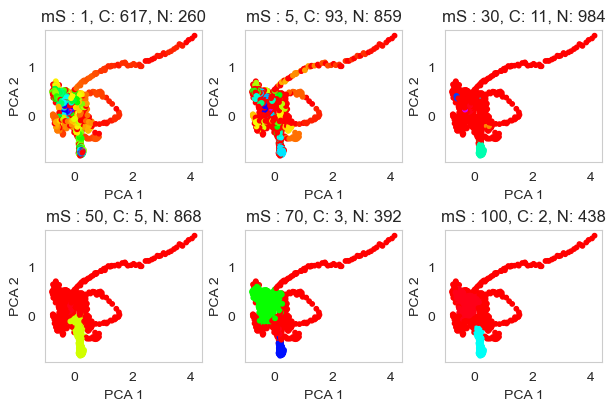

<Figure size 640x480 with 0 Axes>

In [43]:
hdbscan_effect_of_min_samples(data = pca_2D_data, min_clust_size = 2, parameters = [1, 5, 30, 50, 70, 100], type = ['PCA', 'HDSCAN'])

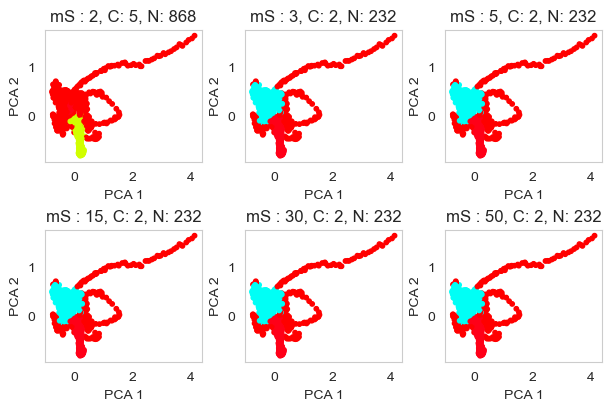

<Figure size 640x480 with 0 Axes>

In [44]:
hdbscan_effect_of_min_cluster_size(data = pca_2D_data, min_sample = 50, parameters = [2, 3, 5, 15, 30, 50], type = ['PCA', 'HDSCAN'])

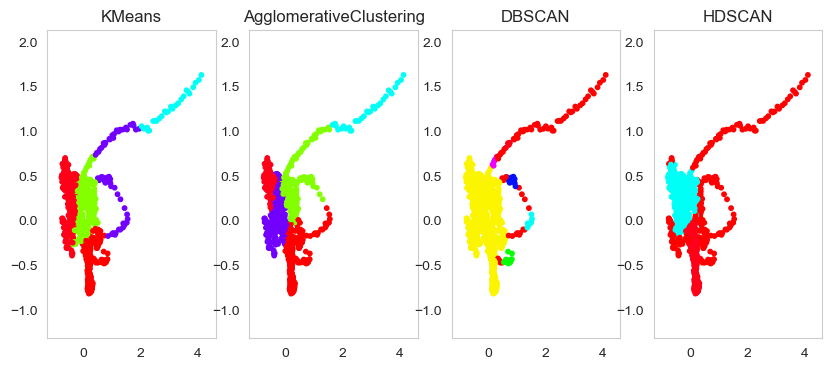

<Figure size 640x480 with 0 Axes>

In [45]:
# plot cluster
fig = plt.figure(figsize=(10, 4))
sns.set_style("whitegrid", {'axes.grid' : False})

## PCA
type = 'PCA_allClustering'

x = pca_2D_data[:, 0]
y = pca_2D_data[:, 1]


# KMeans
axs = fig.add_subplot(141)

axs.scatter(x, y, c = kmeans_PCA_2D_data, s = 10, cmap = 'hsv'); axs.set_title('KMeans'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

# AgglomerativeClustering
axs = fig.add_subplot(142)

axs.scatter(x, y, c = aggloClust_PCA_2D_data, s = 10, cmap = 'hsv'); axs.set_title('AgglomerativeClustering'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

## DBSCAN
axs = fig.add_subplot(143)

axs.scatter(x, y, c = dbscan_with_pca, s = 10, cmap = 'hsv'); axs.set_title('DBSCAN');  axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])


## Spectral Embedding
axs = fig.add_subplot(144)

axs.scatter(x, y, c = hdbscan_PCA_2D_data, s = 10, cmap = 'hsv'); axs.set_title('HDSCAN');  axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

# display the figure
plt.show()

# save figure
plt.savefig(f'./reports/{type}_2D_scatterplot.png')



## 3.2 ISOMAP inputs

### 3.2.1 KMEans

In [46]:
kmeans_ISOMAP = KMeans(n_clusters = 5, random_state = 1, n_init = 10)

In [47]:
# fit data
kmeans_with_ISOMAP = kmeans_ISOMAP.fit(ISOMAP_2D_data)
# predict cluster
kmeans_ISOMAP_2D_data = kmeans_with_ISOMAP.predict(ISOMAP_2D_data)

Estimated number of clusters: 5
Estimated number of noise points: 0


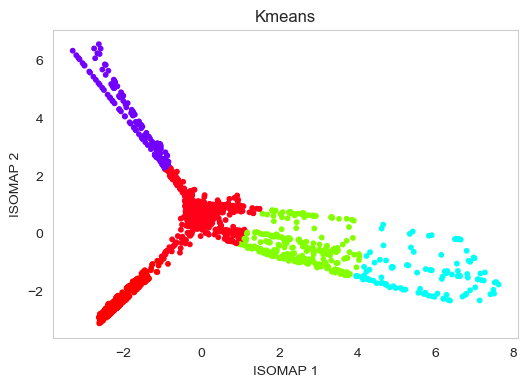

In [48]:
# plot cluster
plot_2D_scatter(data = ISOMAP_2D_data, labels = kmeans_ISOMAP_2D_data, type = ['ISOMAP', 'Kmeans'])

### 3.2.2 AgglomerativeClustering

In [49]:
# instantiate algorithm
aggloClust_ISOMAP = AgglomerativeClustering(n_clusters = 5)

In [50]:
# fit data 
aggloClust_with_ISOMAP = aggloClust_ISOMAP.fit(ISOMAP_2D_data)

In [51]:
# predict cluster
aggloClust_ISOMAP_2D_data = aggloClust_with_ISOMAP.labels_

Estimated number of clusters: 5
Estimated number of noise points: 0


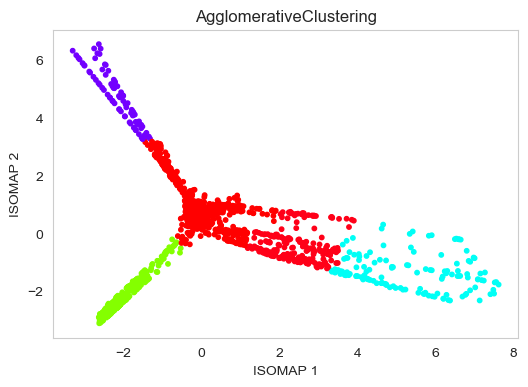

In [52]:
plot_2D_scatter(data = ISOMAP_2D_data , labels = aggloClust_ISOMAP_2D_data, type = ['ISOMAP', 'AgglomerativeClustering'])

### 3.2.3 DBSCAN

In [53]:
dbscan_ISOMAP = DBSCAN(eps = 0.5, min_samples = 10)

Estimated number of clusters: 1
Estimated number of noise points: 20


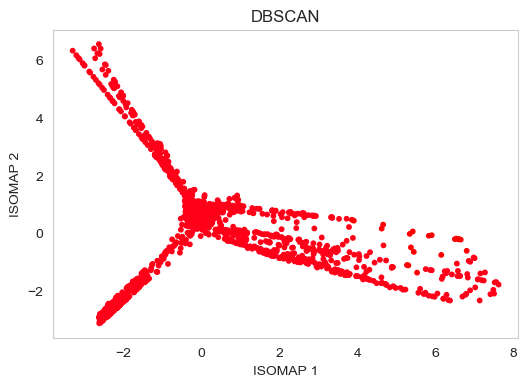

In [54]:
# fit data and predict cluster
dbscan_with_ISOMAP = dbscan_ISOMAP.fit_predict(ISOMAP_2D_data)
# plot cluster
plot_2D_scatter(data = ISOMAP_2D_data , labels = dbscan_with_ISOMAP, type = ['ISOMAP', 'DBSCAN'])


Effect of min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point

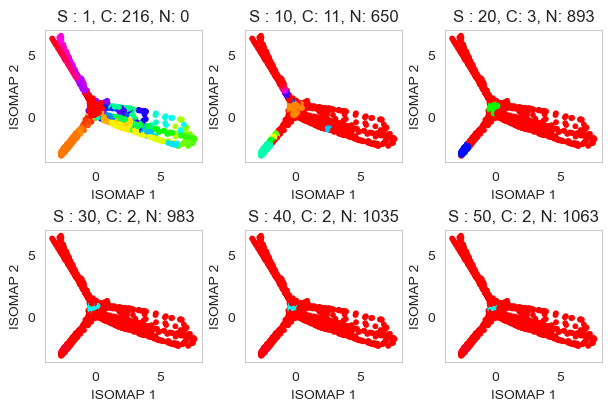

<Figure size 640x480 with 0 Axes>

In [55]:
effect_of_min_samples(
                        data = ISOMAP_2D_data, eps = 0.1, parameters = [1, 10, 20, 30, 40, 50], type = ['ISOMAP', 'DBSCAN']
                        )

Effect of eps i.e. maximum distance between two samples for one to be considered as in the neighborhood of the other.

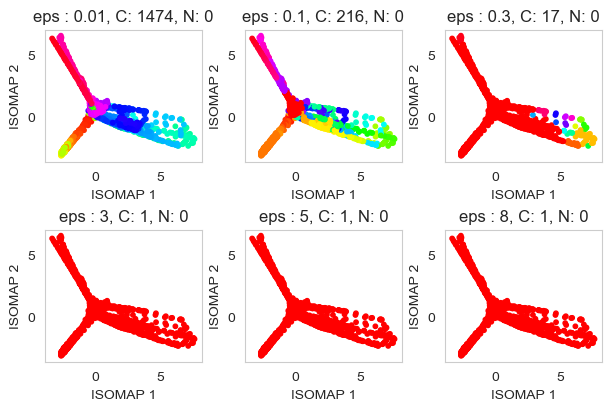

<Figure size 640x480 with 0 Axes>

In [56]:
effect_of_eps(
                data = ISOMAP_2D_data, min_sample_ = 1, parameters = [0.01, 0.1, 0.3, 3, 5, 8], type = ['ISOMAP', 'DBSCAN']
                )

### 3.2.4 HDBSCAN

In [57]:
# instantiate algorithm
hdbscan_ISOMAP = hdbscan.HDBSCAN(min_cluster_size = 5, min_samples = 10)

Estimated number of clusters: 17
Estimated number of noise points: 469


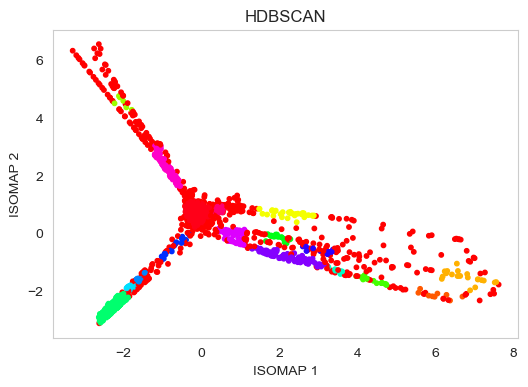

In [58]:
# fit data and predict cluster
hdbscan_ISOMAP_2D_data = hdbscan_ISOMAP.fit_predict(ISOMAP_2D_data)
# plot cluster
plot_2D_scatter(data = ISOMAP_2D_data , labels = hdbscan_ISOMAP_2D_data, type = ['ISOMAP', 'HDBSCAN'])


Effect of min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point. The simplest intuition for what min_samples does is provide a measure of how \
conservative you want you clustering to be. The larger the value of min_samples you provide, the more conservative the clustering – more points will be declared as noise, \
and clusters will be restricted to progressively more dense areas. We can see this in practice by leaving the min_cluster_size at 60, but reducing min_samples to 1.

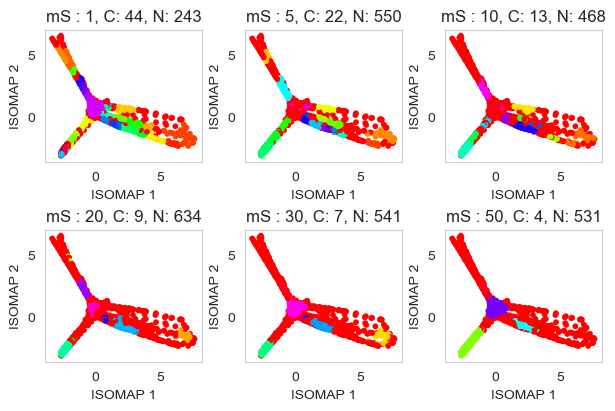

<Figure size 640x480 with 0 Axes>

In [59]:
hdbscan_effect_of_min_samples(data = ISOMAP_2D_data, min_clust_size = 10, parameters = [1, 5, 10, 20, 30, 50], type = ['ISOMAP', 'HDSCAN'])

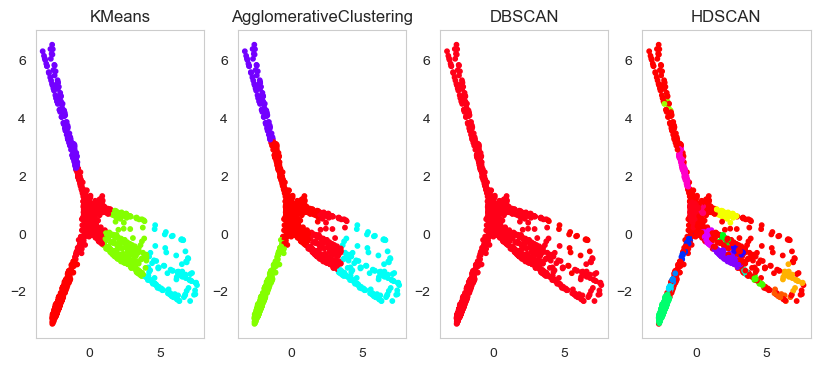

<Figure size 640x480 with 0 Axes>

In [60]:
# plot cluster
fig = plt.figure(figsize=(10, 4))
sns.set_style("whitegrid", {'axes.grid' : False})

## ISOMAP
type = 'ISOMAP_allClustering'

x = ISOMAP_2D_data[:, 0]
y = ISOMAP_2D_data[:, 1]



# KMeans
axs = fig.add_subplot(141)

axs.scatter(x, y, c = kmeans_ISOMAP_2D_data, s = 10, cmap = 'hsv'); axs.set_title('KMeans');  axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

# AgglomerativeClustering
axs = fig.add_subplot(142)

axs.scatter(x, y, c = aggloClust_ISOMAP_2D_data, s = 10, cmap = 'hsv'); axs.set_title('AgglomerativeClustering');  axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

## DBSCAN
axs = fig.add_subplot(143)

axs.scatter(x, y, c = dbscan_with_ISOMAP, s = 10, cmap = 'hsv'); axs.set_title('DBSCAN');  axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])


## Spectral Embedding
axs = fig.add_subplot(144)

axs.scatter(x, y, c = hdbscan_ISOMAP_2D_data, s = 10, cmap = 'hsv'); axs.set_title('HDSCAN');  axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

# display the figure
plt.show()

# save figure
plt.savefig(f'./reports/{type}_2D_scatterplot.png')



## 3.3 tSNE inputs

### 3.3.1 KMEans

In [61]:
kmeans_tSNE = KMeans(n_clusters = 5, random_state = 1, n_init = 10)

In [62]:
# fit data
kmeans_with_tSNE = kmeans_tSNE.fit(tsne_2D_data)
# predict cluster
kmeans_tSNE_2D_data = kmeans_with_tSNE.predict(tsne_2D_data)

Estimated number of clusters: 5
Estimated number of noise points: 0


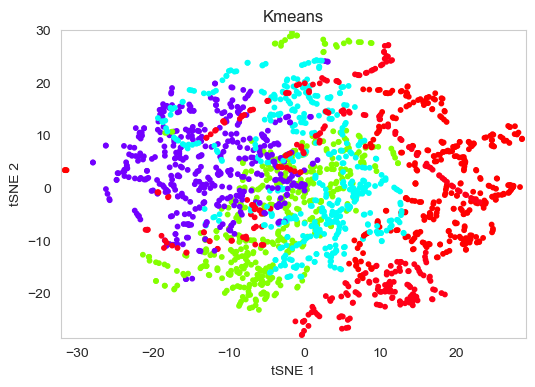

In [63]:
# plot clusters
plot_2D_scatter(data = tsne_3D_data , labels = kmeans_tSNE_2D_data, type = ['tSNE', 'Kmeans'])

### 3.3.2 AgglomerativeClustering

In [64]:
# instantiate algorithm
aggloClust_tSNE = AgglomerativeClustering(n_clusters = 5)

In [65]:
# fit data 
aggloClust_with_tSNE = aggloClust_tSNE.fit(tsne_2D_data)

In [66]:
# predict cluster
aggloClust_tSNE_2D_data = aggloClust_with_tSNE.labels_

Estimated number of clusters: 5
Estimated number of noise points: 0


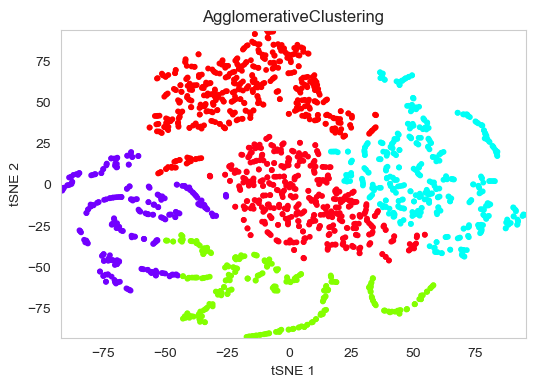

In [67]:
plot_2D_scatter(data = tsne_2D_data , labels = aggloClust_tSNE_2D_data, type = ['tSNE', 'AgglomerativeClustering'])

### 3.3.3 DBSCAN

In [68]:
dbscan_tSNE = DBSCAN(eps = 5, min_samples = 2)

Estimated number of clusters: 48
Estimated number of noise points: 0


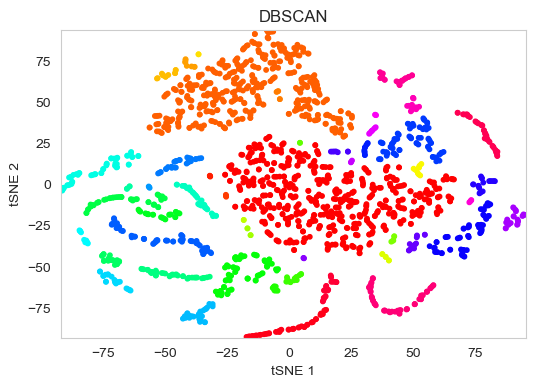

In [69]:
# fit data and predict cluster
dbscan_with_tSNE = dbscan_tSNE.fit_predict(tsne_2D_data)

# plot cluster
plot_2D_scatter(data = tsne_2D_data , labels = dbscan_with_tSNE, type = ['tSNE', 'DBSCAN'])

Effect of min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point

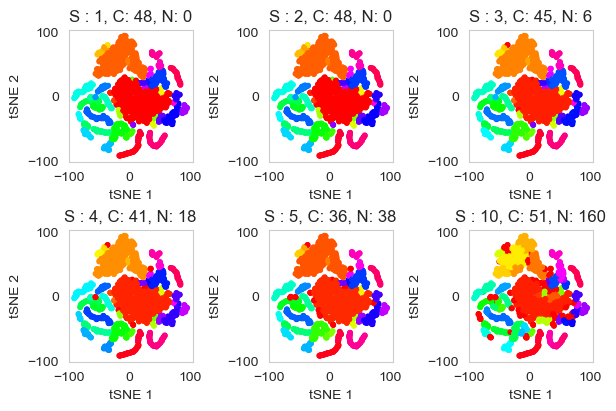

<Figure size 640x480 with 0 Axes>

In [70]:
effect_of_min_samples(
                        data = tsne_2D_data, eps = 5, parameters = [1, 2, 3, 4, 5, 10], type = ['tSNE', 'DBSCAN']
                        )

Effect of eps i.e. maximum distance between two samples for one to be considered as in the neighborhood of the other.

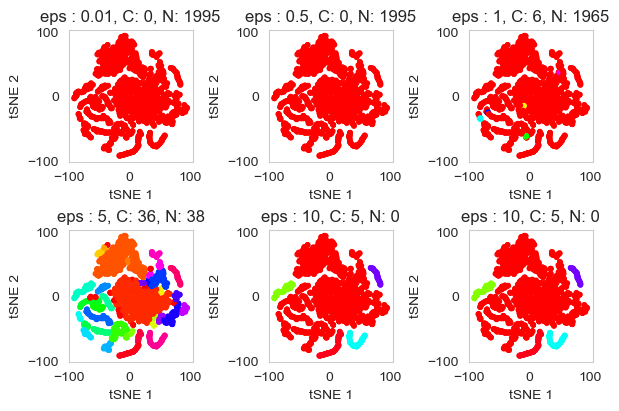

<Figure size 640x480 with 0 Axes>

In [71]:
effect_of_eps(
                data = tsne_2D_data, min_sample_ = 5, parameters = [0.01, 0.5, 1, 5, 10, 10], type = ['tSNE', 'DBSCAN']
                )

### 3.3.4 HDBSCAN

In [72]:
# instantiate algorithm
hdbscan_tSNE = hdbscan.HDBSCAN(min_cluster_size = 20, min_samples = 20)

Estimated number of clusters: 11
Estimated number of noise points: 206


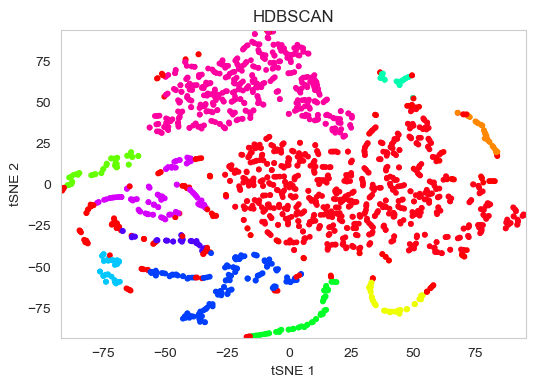

In [73]:
# fit data and predict cluster
hdbscan_tSNE_2D_data = hdbscan_tSNE.fit_predict(tsne_2D_data)
# plot cluster
plot_2D_scatter(data = tsne_2D_data , labels = hdbscan_tSNE_2D_data, type = ['tSNE', 'HDBSCAN'])

Effect of min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point. The simplest intuition for what min_samples does is provide a measure of how \
conservative you want you clustering to be. The larger the value of min_samples you provide, the more conservative the clustering – more points will be declared as noise, \
and clusters will be restricted to progressively more dense areas. We can see this in practice by leaving the min_cluster_size at 60, but reducing min_samples to 1.

min_clust_size: 2


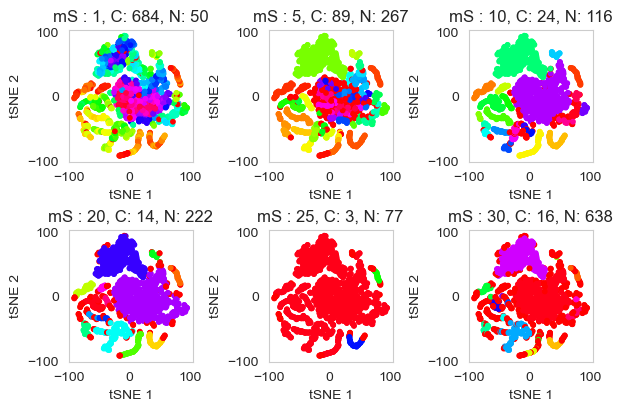

min_clust_size: 5


<Figure size 640x480 with 0 Axes>

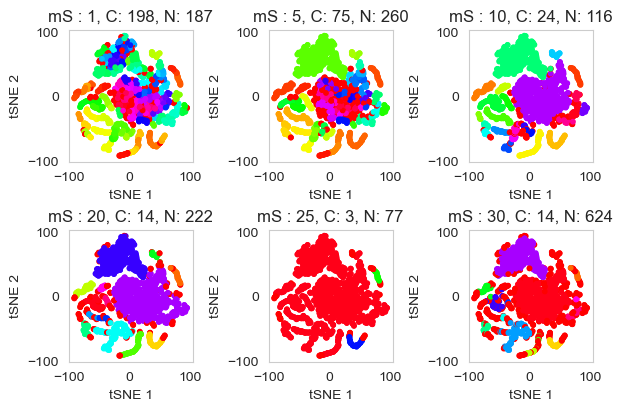

min_clust_size: 10


<Figure size 640x480 with 0 Axes>

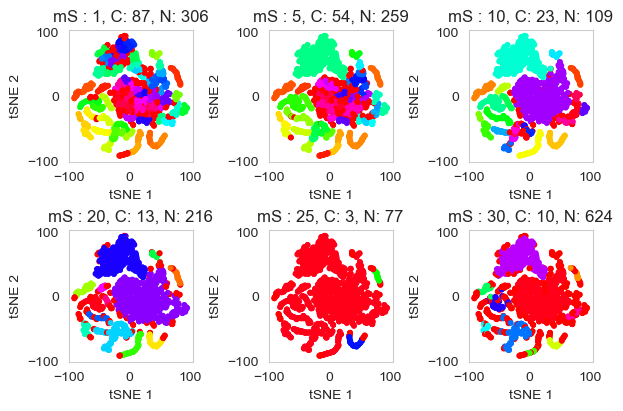

min_clust_size: 15


<Figure size 640x480 with 0 Axes>

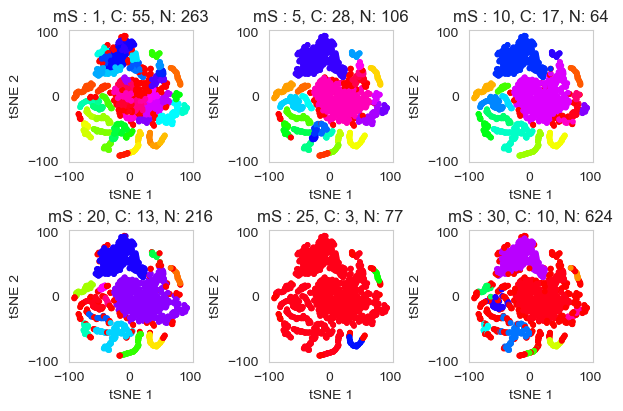

min_clust_size: 20


<Figure size 640x480 with 0 Axes>

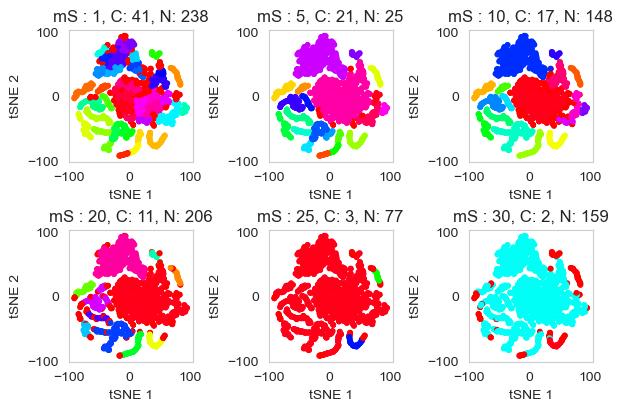

min_clust_size: 30


<Figure size 640x480 with 0 Axes>

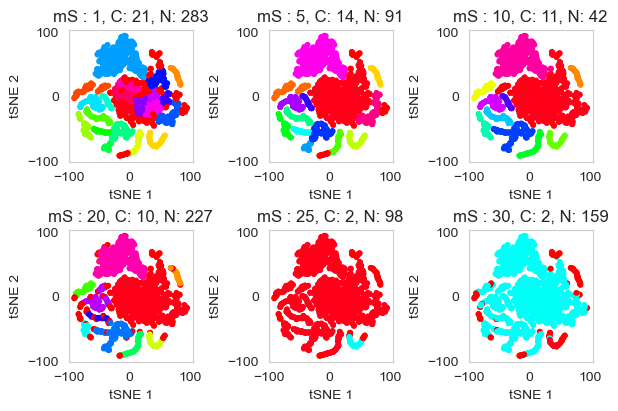

min_clust_size: 50


<Figure size 640x480 with 0 Axes>

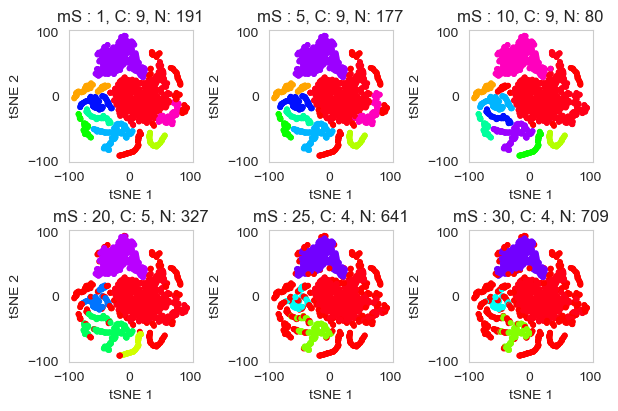

<Figure size 640x480 with 0 Axes>

In [74]:
for i in [2, 5, 10, 15, 20, 30, 50]:
    print(f"min_clust_size: {i}")
    hdbscan_effect_of_min_samples(data = tsne_2D_data, min_clust_size = i, parameters = [1, 5, 10, 20, 25, 30], type = ['tSNE', 'HDSCAN'])

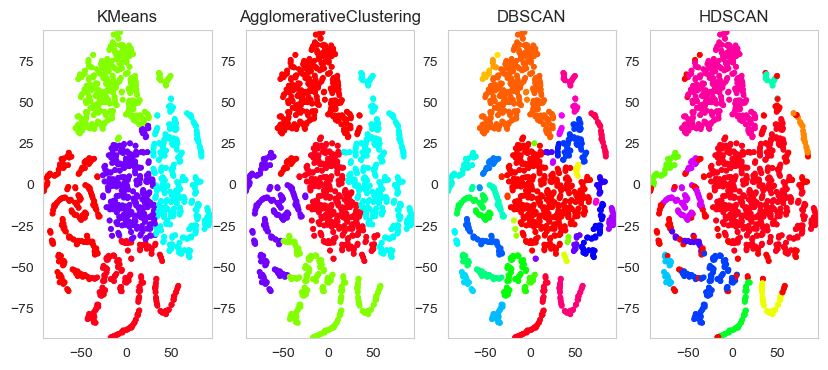

<Figure size 640x480 with 0 Axes>

In [75]:
# plot cluster
fig = plt.figure(figsize=(10, 4))
sns.set_style("whitegrid", {'axes.grid' : False})

## PCA
type = 'tSNE_allClustering'

x = tsne_2D_data[:, 0]
y = tsne_2D_data[:, 1]


# KMeans
axs = fig.add_subplot(141)

axs.scatter(x, y, c = kmeans_tSNE_2D_data, s = 10, cmap = 'hsv'); axs.set_title('KMeans'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

# AgglomerativeClustering
axs = fig.add_subplot(142)

axs.scatter(x, y, c = aggloClust_tSNE_2D_data, s = 10, cmap = 'hsv'); axs.set_title('AgglomerativeClustering'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

## DBSCAN
axs = fig.add_subplot(143)

axs.scatter(x, y, c = dbscan_with_tSNE, s = 10, cmap = 'hsv'); axs.set_title('DBSCAN'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])


## Spectral Embedding
axs = fig.add_subplot(144)

axs.scatter(x, y, c = hdbscan_tSNE_2D_data, s = 10, cmap = 'hsv'); axs.set_title('HDSCAN'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

# display the figure
plt.show()

# save figure
plt.savefig(f'./reports/{type}_2D_scatterplot.png')



## 3.4 Fast ICA data

### 3.4.1 KMEans

In [76]:
kmeans_ICA = KMeans(n_clusters = 5, random_state = 1, n_init = 10)

Estimated number of clusters: 5
Estimated number of noise points: 0


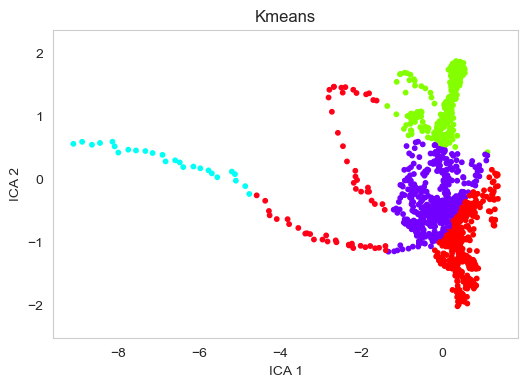

In [77]:
# fit data
kmeans_with_ICA = kmeans_tSNE.fit(fastICA_2D_data)
# predict cluster
kmeans_ICA_2D_data = kmeans_with_ICA.predict(fastICA_2D_data)
# plot cluster
plot_2D_scatter(data = fastICA_2D_data , labels = kmeans_ICA_2D_data, type = ['ICA', 'Kmeans'])

### 3.4.2 AgglomerativeClustering

In [78]:
# instantiate algorithm
aggloClust_ICA = AgglomerativeClustering(n_clusters = 5)

Estimated number of clusters: 5
Estimated number of noise points: 0


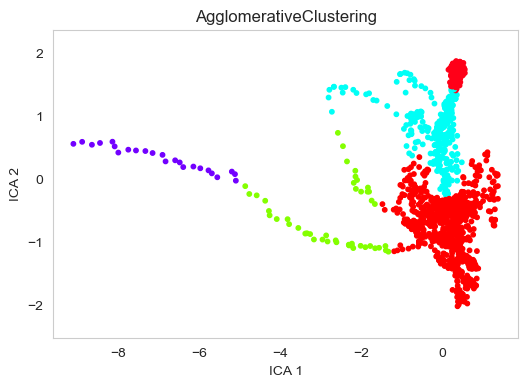

In [79]:
# fit data 
aggloClust_with_ICA = aggloClust_ICA.fit(fastICA_2D_data)
# predict cluster
aggloClust_ICA_2D_data = aggloClust_with_ICA.labels_
# show cluster
plot_2D_scatter(data = fastICA_2D_data , labels = aggloClust_ICA_2D_data, type = ['ICA', 'AgglomerativeClustering'])

### 3.3.3 DBSCAN

In [80]:
dbscan_ICA = DBSCAN(eps = 0.4, min_samples = 5)

Estimated number of clusters: 5
Estimated number of noise points: 5


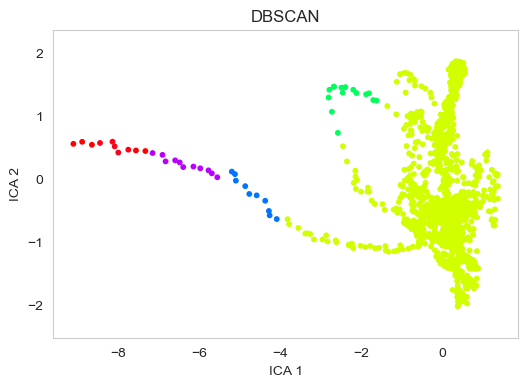

In [81]:
# fit data and predict cluster
dbscan_with_ICA = dbscan_ICA.fit_predict(fastICA_2D_data)
# plot cluster
plot_2D_scatter(data = fastICA_2D_data , labels = dbscan_with_ICA, type = ['ICA', 'DBSCAN'])


Effect of min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point

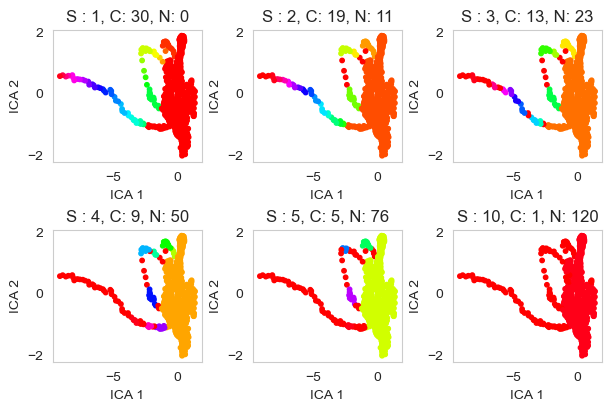

<Figure size 640x480 with 0 Axes>

In [82]:
effect_of_min_samples(
                        data = fastICA_2D_data, eps = 0.2, parameters = [1, 2, 3, 4, 5, 10], type = ['ICA', 'DBSCAN']
                        )

Effect of eps i.e. maximum distance between two samples for one to be considered as in the neighborhood of the other.

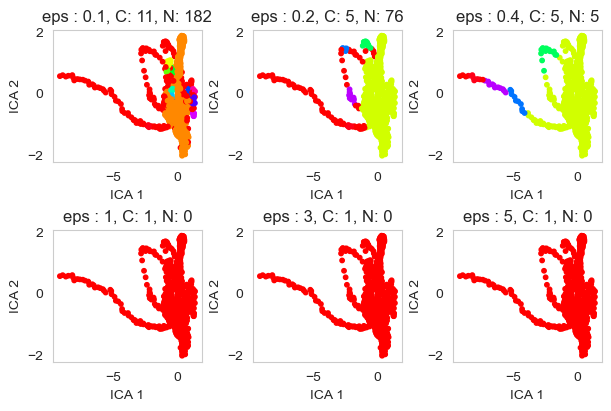

<Figure size 640x480 with 0 Axes>

In [83]:
effect_of_eps(
                data = fastICA_2D_data, min_sample_ = 5, parameters = [0.1, 0.2, 0.4, 1, 3, 5], type = ['ICA', 'DBSCAN']
                )

### 3.3.4 HDBSCAN

In [84]:
# instantiate algorithm
hdbscan_ICA = hdbscan.HDBSCAN(min_cluster_size = 20, min_samples = 30)

Estimated number of clusters: 3
Estimated number of noise points: 863


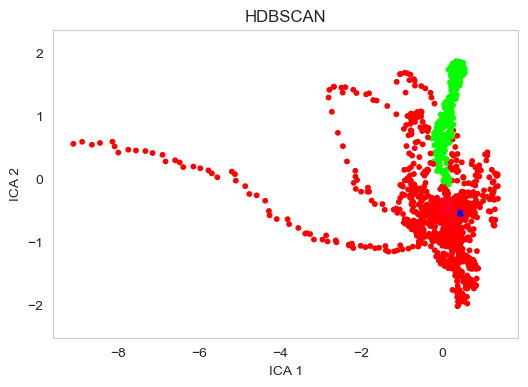

In [85]:
# fit data and predict cluster
hdbscan_ICA_2D_data = hdbscan_ICA.fit_predict(fastICA_2D_data)
# plot cluster
plot_2D_scatter(data = fastICA_2D_data , labels = hdbscan_ICA_2D_data, type = ['ICA', 'HDBSCAN'])


Effect of min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point. The simplest intuition for what min_samples does is provide a measure of how \
conservative you want you clustering to be. The larger the value of min_samples you provide, the more conservative the clustering – more points will be declared as noise, \
and clusters will be restricted to progressively more dense areas. We can see this in practice by leaving the min_cluster_size at 60, but reducing min_samples to 1.

min_clust_size: 2


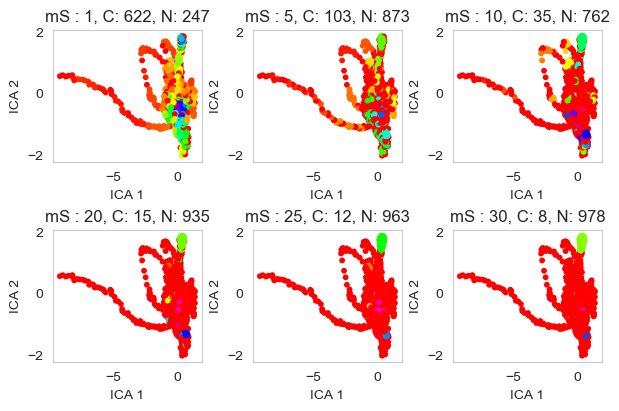

min_clust_size: 5


<Figure size 640x480 with 0 Axes>

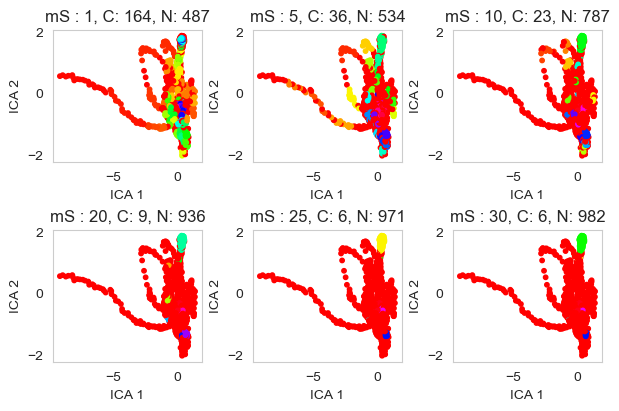

min_clust_size: 10


<Figure size 640x480 with 0 Axes>

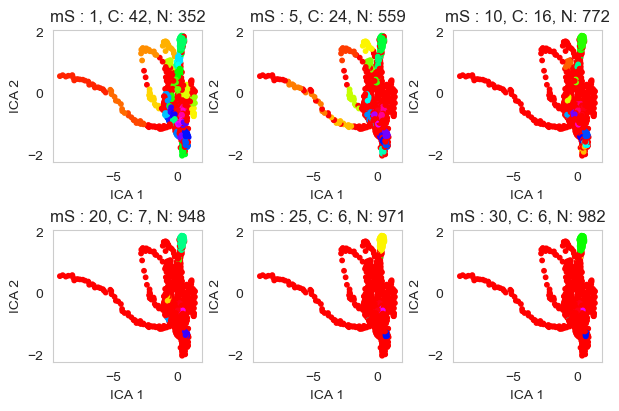

min_clust_size: 15


<Figure size 640x480 with 0 Axes>

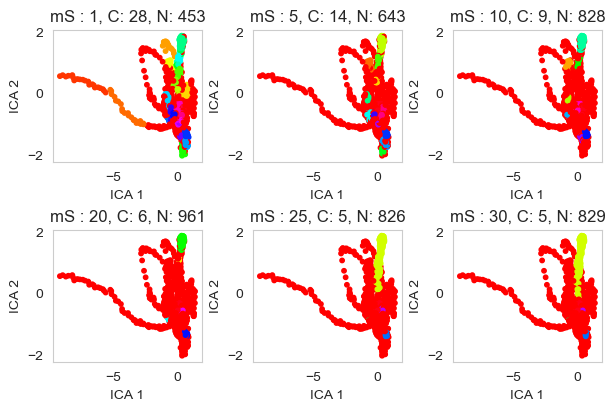

min_clust_size: 20


<Figure size 640x480 with 0 Axes>

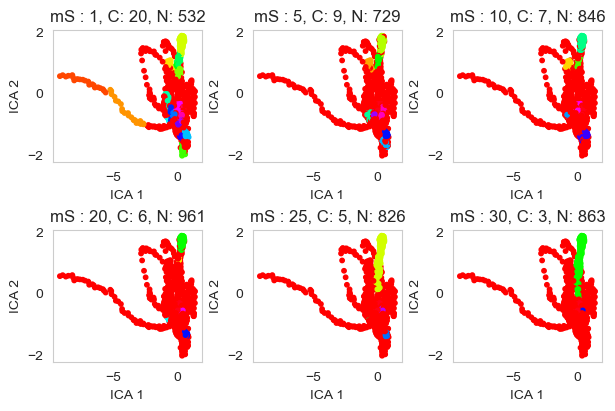

min_clust_size: 30


<Figure size 640x480 with 0 Axes>

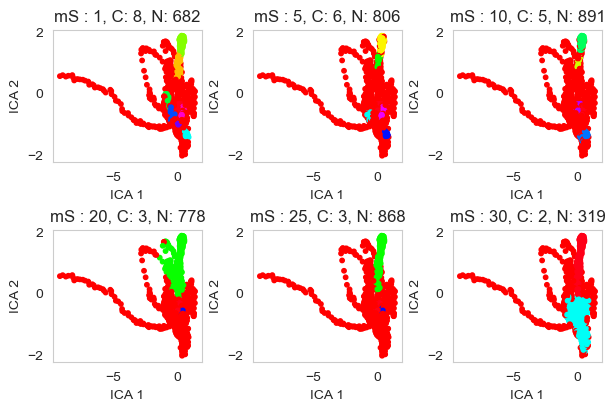

min_clust_size: 50


<Figure size 640x480 with 0 Axes>

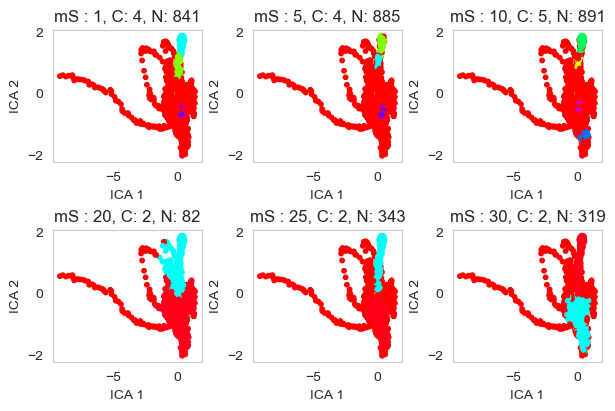

<Figure size 640x480 with 0 Axes>

In [86]:
for i in [2, 5, 10, 15, 20, 30, 50]:
    print(f"min_clust_size: {i}")
    hdbscan_effect_of_min_samples(data = fastICA_2D_data, min_clust_size = i, parameters = [1, 5, 10, 20, 25, 30], type = ['ICA', 'HDSCAN'])

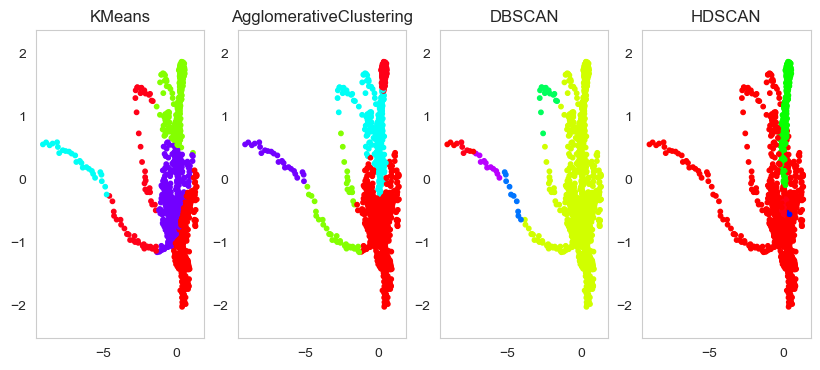

<Figure size 640x480 with 0 Axes>

In [87]:
# plot cluster
fig = plt.figure(figsize=(10, 4))
sns.set_style("whitegrid", {'axes.grid' : False})

## fast ICA
type = 'fastICA_allClustering'

x = fastICA_2D_data[:, 0]
y = fastICA_2D_data[:, 1]


# KMeans
axs = fig.add_subplot(141)

axs.scatter(x, y, c = kmeans_ICA_2D_data, s = 10, cmap = 'hsv'); axs.set_title('KMeans'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

# AgglomerativeClustering
axs = fig.add_subplot(142)

axs.scatter(x, y, c = aggloClust_ICA_2D_data, s = 10, cmap = 'hsv'); axs.set_title('AgglomerativeClustering'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

## DBSCAN
axs = fig.add_subplot(143)

axs.scatter(x, y, c = dbscan_with_ICA, s = 10, cmap = 'hsv'); axs.set_title('DBSCAN'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])


## Spectral Embedding
axs = fig.add_subplot(144)

axs.scatter(x, y, c = hdbscan_ICA_2D_data, s = 10, cmap = 'hsv'); axs.set_title('HDSCAN'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

# display the figure
plt.show()

# save figure
plt.savefig(f'./reports/{type}_2D_scatterplot.png')



## 3.5 Spectral Embedding data

### 3.5.1 KMEans

In [88]:
kmeans_EMBED = KMeans(n_clusters = 5, random_state = 1, n_init = 10)

Estimated number of clusters: 5
Estimated number of noise points: 0


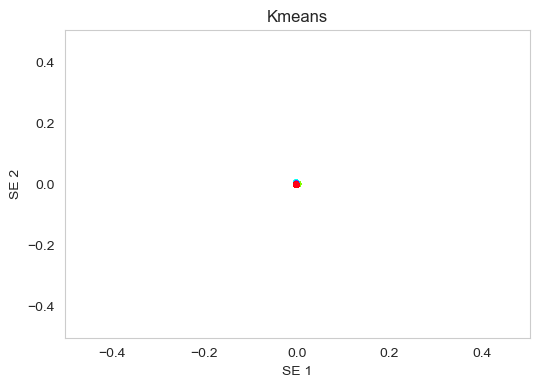

In [89]:
# fit data
kmeans_with_EMBED = kmeans_EMBED.fit(embedding_2D_data)
# predict cluster
kmeans_EMBED_2D_data = kmeans_with_EMBED.predict(embedding_2D_data)
# plot cluster
plot_2D_scatter(data = embedding_2D_data , labels = kmeans_EMBED_2D_data, type = ['SE', 'Kmeans'])

### 3.5.2 AgglomerativeClustering

In [90]:
# instantiate algorithm
aggloClust_EMBED = AgglomerativeClustering(n_clusters = 5)

Estimated number of clusters: 5
Estimated number of noise points: 0


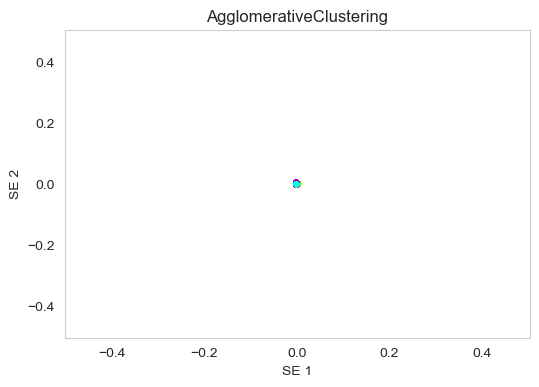

In [91]:
# fit data 
aggloClust_with_EMBED = aggloClust_EMBED.fit(embedding_2D_data)
# predict cluster
aggloClust_EMBED_2D_data = aggloClust_with_EMBED.labels_
# plot cluster
plot_2D_scatter(data = embedding_2D_data , labels = aggloClust_EMBED_2D_data, type = ['SE', 'AgglomerativeClustering'])

### 3.5.3 DBSCAN

In [92]:
dbscan_EMBED = DBSCAN(eps = 0.1, min_samples = 1)

Estimated number of clusters: 1
Estimated number of noise points: 0


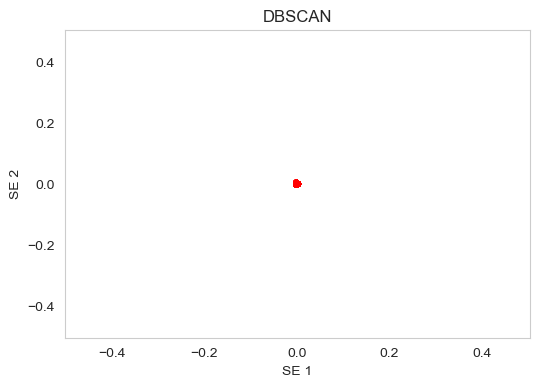

In [93]:
# fit data and predict cluster
dbscan_with_EMBED = dbscan_EMBED.fit_predict(embedding_2D_data)
# plot cluster
plot_2D_scatter(data = embedding_2D_data , labels = dbscan_with_EMBED, type = ['SE', 'DBSCAN'])


Effect of min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point

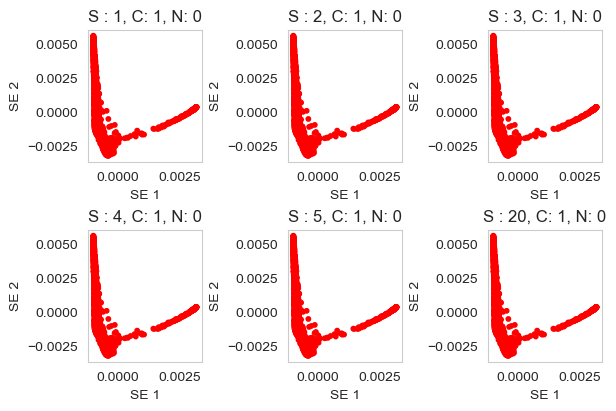

<Figure size 640x480 with 0 Axes>

In [94]:
effect_of_min_samples(
                        data = embedding_2D_data, eps = 0.1, parameters = [1, 2, 3, 4, 5, 20], type = ['SE', 'DBSCAN']
                        )

Effect of eps i.e. maximum distance between two samples for one to be considered as in the neighborhood of the other.

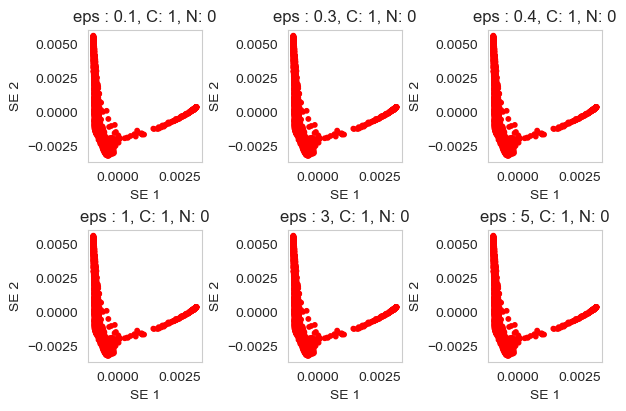

<Figure size 640x480 with 0 Axes>

In [95]:
effect_of_eps(
                data = embedding_2D_data, min_sample_ = 5, parameters = [0.1, 0.3, 0.4, 1, 3, 5], type = ['SE', 'DBSCAN']
                )

### 3.5.4 HDBSCAN

In [96]:
# instantiate algorithm
hdbscan_EMBED = hdbscan.HDBSCAN(min_cluster_size = 5, min_samples = 38)

Estimated number of clusters: 7
Estimated number of noise points: 471


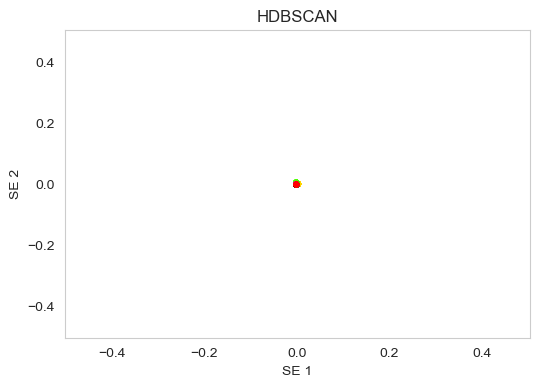

In [97]:
# fit data and predict cluster
hdbscan_EMBED_2D_data = hdbscan_EMBED.fit_predict(embedding_2D_data)
# plot cluster
plot_2D_scatter(data = embedding_2D_data , labels = hdbscan_EMBED_2D_data, type = ['SE', 'HDBSCAN'])


Effect of min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point. The simplest intuition for what min_samples does is provide a measure of how \
conservative you want you clustering to be. The larger the value of min_samples you provide, the more conservative the clustering – more points will be declared as noise, \
and clusters will be restricted to progressively more dense areas. We can see this in practice by leaving the min_cluster_size at 60, but reducing min_samples to 1.

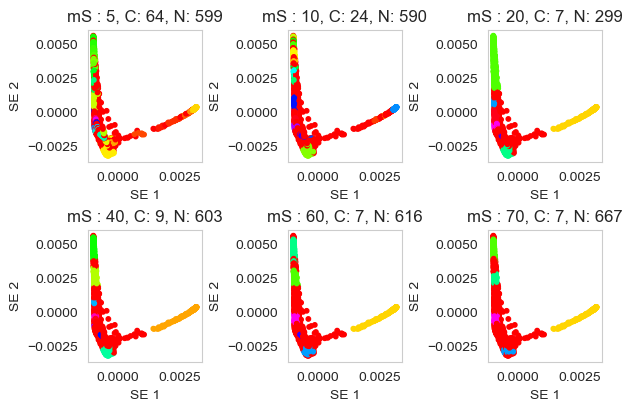

<Figure size 640x480 with 0 Axes>

In [98]:
hdbscan_effect_of_min_samples(data = embedding_2D_data, min_clust_size = 5, parameters = [5, 10, 20, 40, 60, 70], type = ['SE', 'HDSCAN'])

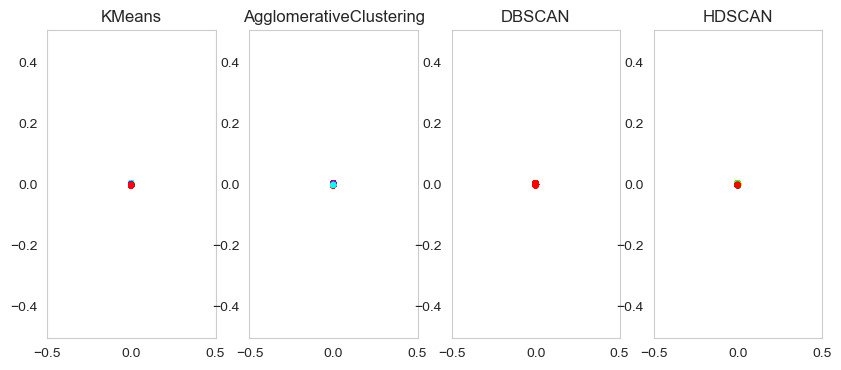

<Figure size 640x480 with 0 Axes>

In [99]:

# plot cluster
fig = plt.figure(figsize=(10, 4))
sns.set_style("whitegrid", {'axes.grid' : False})

## Spectral Embedding
type = 'SpectralEMBED_allClustering'

x = embedding_2D_data[:, 0]
y = embedding_2D_data[:, 1]


# KMeans
axs = fig.add_subplot(141)

axs.scatter(x, y, c = kmeans_EMBED_2D_data, s = 10, cmap = 'hsv'); axs.set_title('KMeans'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

# AgglomerativeClustering
axs = fig.add_subplot(142)

axs.scatter(x, y, c = aggloClust_EMBED_2D_data, s = 10, cmap = 'hsv'); axs.set_title('AgglomerativeClustering'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

## DBSCAN
axs = fig.add_subplot(143)

axs.scatter(x, y, c = dbscan_with_EMBED, s = 10, cmap = 'hsv'); axs.set_title('DBSCAN'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])


## Spectral Embedding
axs = fig.add_subplot(144)

axs.scatter(x, y, c = hdbscan_EMBED_2D_data, s = 10, cmap = 'hsv'); axs.set_title('HDSCAN'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

# display the figure
plt.show()

# save figure
plt.savefig(f'./reports/{type}_2D_scatterplot.png')



## 3.6 UMAP data

### 3.6.1 KMEans

In [100]:
kmeans_UMAP = KMeans(n_clusters = 5, random_state = 1, n_init = 10)

Estimated number of clusters: 5
Estimated number of noise points: 0


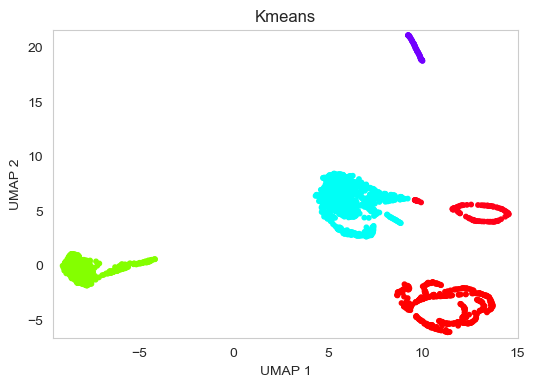

In [101]:
# fit data
kmeans_with_UMAP = kmeans_UMAP.fit(umap_2D_data)
# predict cluster
kmeans_UMAP_2D_data = kmeans_with_UMAP.predict(umap_2D_data)
# plot cluster
plot_2D_scatter(data = umap_2D_data , labels = kmeans_UMAP_2D_data, type = ['UMAP', 'Kmeans'])

### 3.6.2 AgglomerativeClustering

In [102]:
# instantiate algorithm
aggloClust_UMAP = AgglomerativeClustering(n_clusters = 5)

Estimated number of clusters: 5
Estimated number of noise points: 0


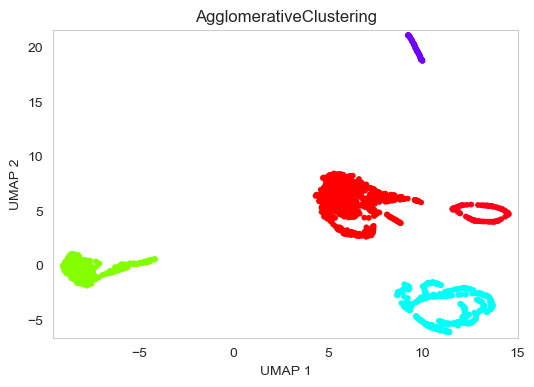

In [103]:
# fit data 
aggloClust_with_UMAP = aggloClust_UMAP.fit(umap_2D_data)
# predict cluster
aggloClust_UMAP_2D_data = aggloClust_with_UMAP.labels_
# plot cluster
plot_2D_scatter(data = umap_2D_data , labels = aggloClust_UMAP_2D_data, type = ['UMAP', 'AgglomerativeClustering'])

### 3.6.3 DBSCAN

In [104]:
dbscan_UMAP = DBSCAN(eps = 0.5, min_samples = 5)

Estimated number of clusters: 5
Estimated number of noise points: 0


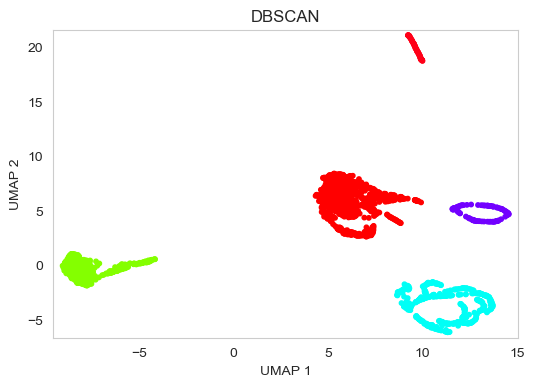

In [105]:
# fit data and predict cluster
dbscan_with_UMAP = dbscan_UMAP.fit_predict(umap_2D_data)
# plot cluster
plot_2D_scatter(data = umap_2D_data , labels = dbscan_with_UMAP, type = ['UMAP', 'DBSCAN'])


Effect of min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point

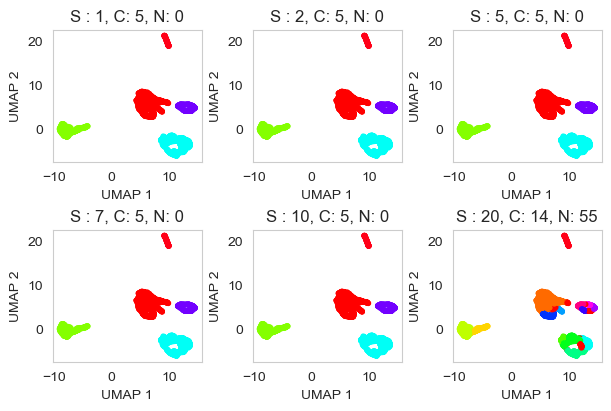

<Figure size 640x480 with 0 Axes>

In [106]:
effect_of_min_samples(
                        data = umap_2D_data, eps = 0.5, parameters = [1, 2, 5, 7, 10, 20], type = ['UMAP', 'DBSCAN']
                        )

Effect of eps i.e. maximum distance between two samples for one to be considered as in the neighborhood of the other.

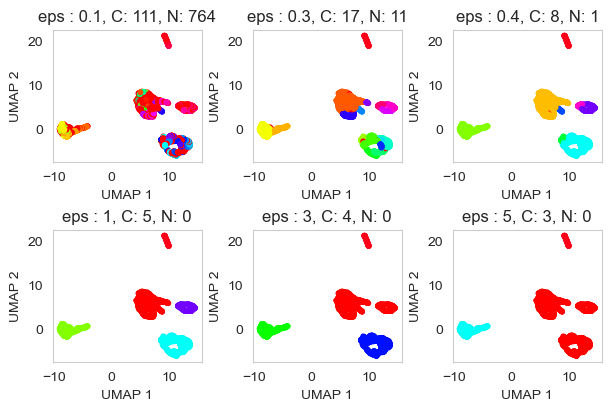

<Figure size 640x480 with 0 Axes>

In [107]:
effect_of_eps(
                data = umap_2D_data, min_sample_ = 5, parameters = [0.1, 0.3, 0.4, 1, 3, 5], type = ['UMAP', 'DBSCAN']
                )

### 3.5.4 HDBSCAN

Estimated number of clusters: 160
Estimated number of noise points: 925


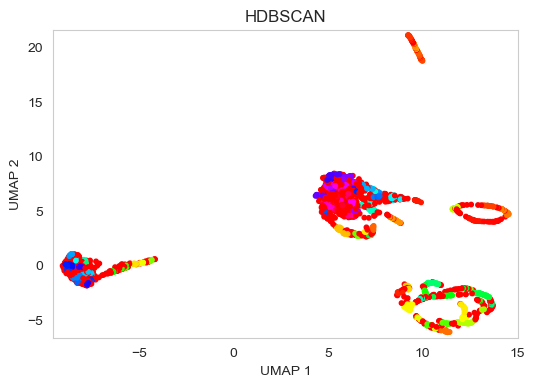

In [108]:
# instantiate algorithm
hdbscan_UMAP = hdbscan.HDBSCAN(min_samples = 5, min_cluster_size = 2, metric = 'manhattan', cluster_selection_method = 'leaf') #min_cluster_size = 5, min_samples = 10)
# fit data and predict cluster
hdbscan_UMAP_2D_data = hdbscan_UMAP.fit_predict(umap_2D_data)
# plot cluster
plot_2D_scatter(data = umap_2D_data , labels = hdbscan_UMAP_2D_data, type = ['UMAP', 'HDBSCAN'])

Effect of min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point. The simplest intuition for what min_samples does is provide a measure of how \
conservative you want you clustering to be. The larger the value of min_samples you provide, the more conservative the clustering – more points will be declared as noise, \
and clusters will be restricted to progressively more dense areas. We can see this in practice by leaving the min_cluster_size at 60, but reducing min_samples to 1.

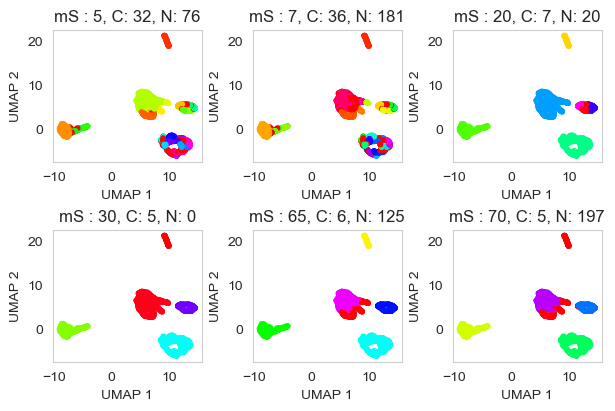

<Figure size 640x480 with 0 Axes>

In [109]:
hdbscan_effect_of_min_samples(data = umap_2D_data, min_clust_size = 10, parameters = [5, 7, 20, 30, 65, 70], type = ['UMAP', 'HDSCAN'])

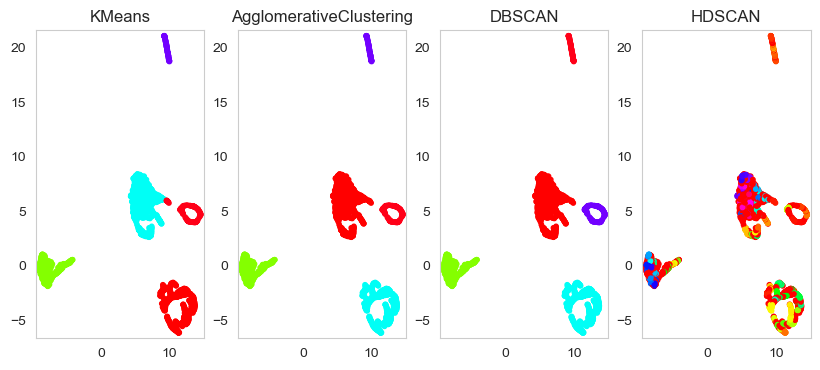

<Figure size 640x480 with 0 Axes>

In [110]:

# plot cluster
fig = plt.figure(figsize=(10, 4))
sns.set_style("whitegrid", {'axes.grid' : False})

## Spectral Embedding
type = 'UMAP_allClustering'

x = umap_2D_data[:, 0]
y = umap_2D_data[:, 1]


# KMeans
axs = fig.add_subplot(141)

axs.scatter(x, y, c = kmeans_UMAP_2D_data, s = 10, cmap = 'hsv'); axs.set_title('KMeans'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

# AgglomerativeClustering
axs = fig.add_subplot(142)

axs.scatter(x, y, c = aggloClust_UMAP_2D_data, s = 10, cmap = 'hsv'); axs.set_title('AgglomerativeClustering'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

## DBSCAN
axs = fig.add_subplot(143)

axs.scatter(x, y, c = dbscan_with_UMAP, s = 10, cmap = 'hsv'); axs.set_title('DBSCAN'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])


## Spectral Embedding
axs = fig.add_subplot(144)

axs.scatter(x, y, c = hdbscan_UMAP_2D_data, s = 10, cmap = 'hsv'); axs.set_title('HDSCAN'); axs.set_xlim([x.min() - 0.5, x.max() + 0.5]); axs.set_ylim([y.min() - 0.5, y.max() + 0.5])

# display the figure
plt.show()

# save figure
plt.savefig(f'./reports/{type}_2D_scatterplot.png')

